# Python Project - Speed Dating Experiment

*URL of our dataset* : https://www.kaggle.com/annavictoria/speed-dating-experiment/data

*Description* : What influences love at first sight? (Or, at least, love in the first four minutes?) This dataset was compiled by Columbia Business School professors Ray Fisman and Sheena Iyengar for their paper Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment.

Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.

The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information. See the Speed Dating Data Key document below for details.

*We'll first try to uncover insights about the data - among which what are the least and most desirable attributes for each gender and the differences between what the individuals say they want, and what they actually like.*
*Then, we'll try to develop a predictive model to match people given their set of attributes* 

*But first, let's import and preprocess the data!*

## Importing data

In [42]:
# the usual import list
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import csv
from math import pi

In [4]:
import urllib.request as ur
ur.urlretrieve("http://www.kaggle.com/account/login?ReturnUrl=c/annavictoria/speed-dating-experiment/downloads/Speed%20Dating%20Data.csv", "Speed Dating Data.csv.zip")


('Speed Dating Data.csv.zip', <http.client.HTTPMessage at 0x11275a2b0>)

*This way to download doesn't actually work : the resulting .zip file is not recognized as a .zip file by Python, and it is much lighter that what we actually get by manually downloading the file. This is because when we download the dataset this way, we don't actually log into Kaggle.*

*A research on the subject on the Internet shows this is not a simple matter, and we never saw how to deal with this kind of thing in class. Code such as the one found on this [page](https://ramhiser.com/2012/11/23/how-to-download-kaggle-data-with-python-and-requests-dot-py/) doesn't work, even after adapting it. We could just copy paste some complicated [code](http://blog.romanofoti.com/download_from_kaggle/) that we do not completely understand and input our credentials here, but this doesn't seem a sensible thing to do.*

*Consequently, we would like to invite you to download the dataset directly using this [link](https://www.kaggle.com/annavictoria/speed-dating-experiment/downloads/Speed%20Dating%20Data.csv).*

*Now that it's done, let's actually import and preprocess the data*

In [5]:
sdd = pd.read_csv("Speed Dating Data.csv", encoding="latin_1", dtype={'field' : str, 'from' : str, 'career' : str})

In [9]:
sdd.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


The NaN values are just missing data, such as a speed dating session where the initial position of the participants was not recorded, or people that did not meet as many dates as the others.

To finish the preprocessing, we would like to remove the rows corresponding to waves 6 to 9, because the participants were not rated in the same way for these waves as for the others (a grade between 1 and 10 for each attribute rather than 100 points to distribute).

The affected ratings series are 1_2, 2_1, 4_1 and 1_1. In the dataset, these ratings were "scaled" so that their sum is equal to 100 (which is why some grades such as 16.67 appear), but have the different instructions caused different grading patterns ? Let's find out ! 

In [13]:
#Here is what we mean when we say that the grades 1-10 have been scaled. Indeed, 16.67*6 = 100
sdd[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].loc[sdd['wave'].isin([6,7,8,9])].head()

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
1846,16.67,16.67,16.67,16.67,16.67,16.67
1847,16.67,16.67,16.67,16.67,16.67,16.67
1848,16.67,16.67,16.67,16.67,16.67,16.67
1849,16.67,16.67,16.67,16.67,16.67,16.67
1850,16.67,16.67,16.67,16.67,16.67,16.67


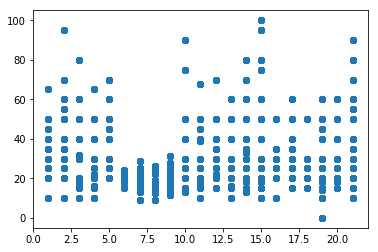

In [14]:
mpl.scatter(sdd['wave'], sdd['attr2_1'])
mpl.show()

What wee see above is that despite the "scaling" of the grades from 1-10 to a total sum of 100, the distribution is still different in waves 6-9. This is probably because when respondants were allocating 100 points, they probably gave a very high grade to a category (for instance, 75 for the importance of attractiveness) while "sacrificing" the other, less important criteria (for instance, by giving them each 5 points). On the other hand, participants from waves 6-9 didn't have to do theses "sacrifices". 

A respondant giving attractiveness 9 points and 1 to all others was still allocating comparatively more points to the other criteria than the previous example (because 5 is 1/15 of 75, whereas 1 is 1/9 of 9). Since people probably did not think in mathematical terms when giving grades, we cannot consider that the data in these waves is matching. 

Therefore we remove these waves. Luckily, this still leaves us with enough data to proceed.

In [15]:
sddOK = sdd.query('wave not in [6,7,8,9]')
sddOK.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


## Unsupervised Learning

### Attributes and Self-Assessment

First, let's look at all the self assessment data. People were asked to rate themselves according to the different attributes, then to express how they thought people rated them, and lastly they were actually rated by other people. 
Let's see how self-perception differs from actual perception by others.

In [70]:
#First, let's look at self assessment of attributes
sddSA = sdd[['iid', 'gender', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1']]
sddSA = sddSA.drop_duplicates()

In [82]:
sddSA.head() #here we have isolated the self assessment of everyone

,iid,gender,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1
0,1,0,6.0,8.0,8.0,8.0,7.0
10,2,0,7.0,5.0,10.0,8.0,3.0
20,3,0,8.0,9.0,8.0,9.0,8.0
30,4,0,7.0,8.0,9.0,7.0,8.0
40,5,0,6.0,3.0,6.0,10.0,8.0


In [83]:
#In the same way, let's isolate the way people think they are perceived by others
sddTP = sdd[['iid', 'gender', 'attr5_1', 'sinc5_1', 'fun5_1', 'intel5_1', 'amb5_1']]
sddTP = sddTP.drop_duplicates()
sddTP.head()

,iid,gender,attr5_1,sinc5_1,fun5_1,intel5_1,amb5_1
0,1,0,NaN,NaN,NaN,NaN,NaN
10,2,0,NaN,NaN,NaN,NaN,NaN
20,3,0,NaN,NaN,NaN,NaN,NaN
30,4,0,NaN,NaN,NaN,NaN,NaN
40,5,0,NaN,NaN,NaN,NaN,NaN


About half the values are missing for this category, but we still have enough data (more than 3000 observations) to make an analysis. Anyway, we will mostly focus on the difference between self perception and actual perception in this part of the project.

In [74]:
#And finally, the way people are actually perceived by others
sddAP = sdd[['iid', 'gender', 'attr_o', 'sinc_o', 'fun_o', 'intel_o', 'amb_o']]
sddAP = sddAP.groupby('iid').agg({'attr_o': 'mean','sinc_o': 'mean', 'fun_o': 'mean', 'intel_o': 'mean', 'amb_o': 'mean'})

In [79]:
sddAP.head()

,attr_o,sinc_o,fun_o,intel_o,amb_o
iid,,,,,
1,6.7,7.4,7.2,8.0,8.000000
2,7.7,7.1,7.5,7.9,7.500000
3,6.5,7.1,6.2,7.3,7.111111
4,7.0,7.1,7.5,7.7,7.700000
5,5.3,7.7,7.2,7.6,7.800000


We would now like to visualize the difference in how people took their decision vs. How they thought they would take these decisions. Could it be that - at least when we only have 4 minutes to take a decision - we choose our partners differently from how we think we do it ?

In [78]:
#First we compute what people thought mattered to them prior to the dates (average values)

Attractive_prior = np.mean(sdd['attr1_1'])
Sincere_prior = np.mean(sdd['sinc1_1'])
Intelligent_prior = np.mean(sdd['intel1_1']) 
Fun_prior = np.mean(sdd['fun1_1'])
Ambitious_prior = np.mean(sdd['amb1_1'])
Interest_prior = np.mean(sdd['shar1_1'])

#Then we compute what actually mattered in people's decisions after the dates (average values)

Attractive_posterior = np.mean(sdd['attr7_2'])
Sincere_posterior = np.mean(sdd['sinc7_2'])
Intelligent_posterior = np.mean(sdd['intel7_2']) 
Fun_posterior = np.mean(sdd['fun7_2'])
Ambitious_posterior = np.mean(sdd['amb7_2'])
Interest_posterior = np.mean(sdd['shar7_2'])

In [77]:
#We turn this into a dictionary so that we can plot the values
prior_radar_data = {'Attractive' : Attractive_prior, 'Sincere' : Sincere_prior, 'Intelligent' : Intelligent_prior, 'Fun' : Fun_prior, 'Ambitious' : Ambitious_prior, 'Interest' : Interest_prior}
prior_radar_data

{'Ambitious': 10.682538953979968,
 'Attractive': 22.514631883359332,
 'Fun': 17.4570430691278,
 'Intelligent': 20.26561272442462,
 'Interest': 11.845110815065958,
 'Sincere': 17.39638872153271}

In [79]:
#Same thing here for posterior values
posterior_radar_data = {'Attractive' : Attractive_posterior, 'Sincere' : Sincere_posterior, 'Intelligent' : Intelligent_posterior, 'Fun' : Fun_posterior, 'Ambitious' : Ambitious_posterior, 'Interest' : Interest_posterior}
posterior_radar_data

{'Ambitious': 7.28695652173913,
 'Attractive': 32.819556451612904,
 'Fun': 18.86844758064516,
 'Intelligent': 15.293850806451612,
 'Interest': 12.156028368794326,
 'Sincere': 13.529923273657289}

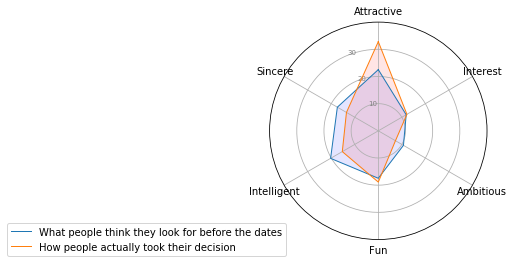

In [95]:
# number of variable
attributes=list(prior_radar_data)
N = len(attributes)

# We set at what angles each attribute will appear, since the graph is circular
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1] #so that all 6 attributes appear on the graph
angles

### Initialise the spider plot
graph = mpl.subplot(polar=True)
 
graph.set_theta_offset(pi / 2) #We set the offset, or "beginning" of the plot to be on top of the circle

# We reduce the number of axes to the number of attributes we want to see on our graph and add labels
# We remove the last element of the angles so that each attribute is on one concentric axis
mpl.xticks(angles[:-1], attributes) 

# Draw ylabels
#ax.set_rlabel_position(0)
mpl.yticks([10,20,30], ["10","20","30"], color="grey", size=7) #set the scale of the graph
mpl.ylim(0,40) #set the limit of the scale of the graph

### Now we add the plotted data

# Plot prior values
values_prior = list(prior_radar_data.values())
values_prior += values_prior[:1] #again we repeat the first item
graph.plot(angles, values_prior, linewidth=1, linestyle='solid', label="What people think they look for before the dates")
graph.fill(angles, values_prior, 'b', alpha=0.1)

# Plot posterior values
values_posterior = list(posterior_radar_data.values())
values_posterior += values_posterior[:1] #again we repeat the first item
graph.plot(angles, values_posterior, linewidth=1, linestyle='solid', label="How people actually took their decision")
graph.fill(angles, values_posterior, 'r', alpha=0.1)

# We add legend
mpl.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

mpl.show()

The Graph shows that people underestimate how much their partner's looks matter to them. This may be due to the fact that, in "real life", they are used to choosing their partner on criteria that take more than 4 minutes to evaluate. One explanation is that because of the time constraint linked to speed dating, people rely more heavily on the criterion that can be evaluated in an instent. Another explanation is that people think of themselves as less shallow than they actually are...